In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt
from Forcasting import graph, conversionSingle, rmsemape
from statsmodels.tsa.arima.model import ARIMA

In [2]:
from Forcasting import graph 

In [3]:
# Load your data
import pandas as pd
data_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(data_url, parse_dates=['Month'], index_col='Month')
data = data.rename(columns={'Passengers': 'Passenger_Count'})


In [4]:
data.head()

,Passenger_Count
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
# Scale data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['Passenger_Count']])
print("Len:", data_scaled.shape)

Len: (144, 1)


In [6]:
# Split data into train and test sets
training_size = round(len(data_scaled) * 0.80)
print("Training Size:", training_size)


Training Size: 115


In [7]:
X_train = data_scaled[:training_size]
X_test = data_scaled[training_size:]
print("X_train length:", X_train.shape)
print("X_test length:", X_test.shape)

y_train = data_scaled[:training_size]
y_test = data_scaled[training_size:]
print("y_train length:", y_train.shape)
print("y_test length:", y_test.shape)

X_train length: (115, 1)
X_test length: (29, 1)
y_train length: (115, 1)
y_test length: (29, 1)


In [8]:
# Train and evaluate MA model
moving_average_orders = [1, 2, 3, 4]

for q in moving_average_orders:
    model = ARIMA(X_train, order=(0, 0, q))
    model_fit = model.fit()
    y_pred = model_fit.predict(start=len(X_train), end=len(data_scaled)-1)
    
    print(f"Moving Average Order={q}")
    print("RMSE-Testset:", mean_squared_error(y_test, y_pred, squared=False))
    print("MAPE-Testset:", mean_absolute_percentage_error(y_test, y_pred))
    print("************")

C:\Users\AB92922\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Moving Average Order=1
RMSE-Testset: 0.40607922981815797
MAPE-Testset: 0.5614834276906372
************
Moving Average Order=2
RMSE-Testset: 0.403329902254946
MAPE-Testset: 0.5549910269661837
************


C:\Users\AB92922\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Moving Average Order=3
RMSE-Testset: 0.393970744039987
MAPE-Testset: 0.5202880905457086
************
Moving Average Order=4
RMSE-Testset: 0.3926074175446679
MAPE-Testset: 0.5144117452874089
************


C:\Users\AB92922\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [9]:
# Fit model with specific MA order
q = 4
model = ARIMA(X_train, order=(0, 0, q))
model_fit = model.fit()
y_pred = model_fit.predict(start=len(X_train), end=len(data_scaled)-1)

print(f"Moving Average Order={q}")
print("RMSE-Testset:", mean_squared_error(y_test, y_pred, squared=False))
print("MAPE-Testset:", mean_absolute_percentage_error(y_test, y_pred))
print("************")

Moving Average Order=4
RMSE-Testset: 0.3926074175446679
MAPE-Testset: 0.5144117452874089
************


C:\Users\AB92922\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


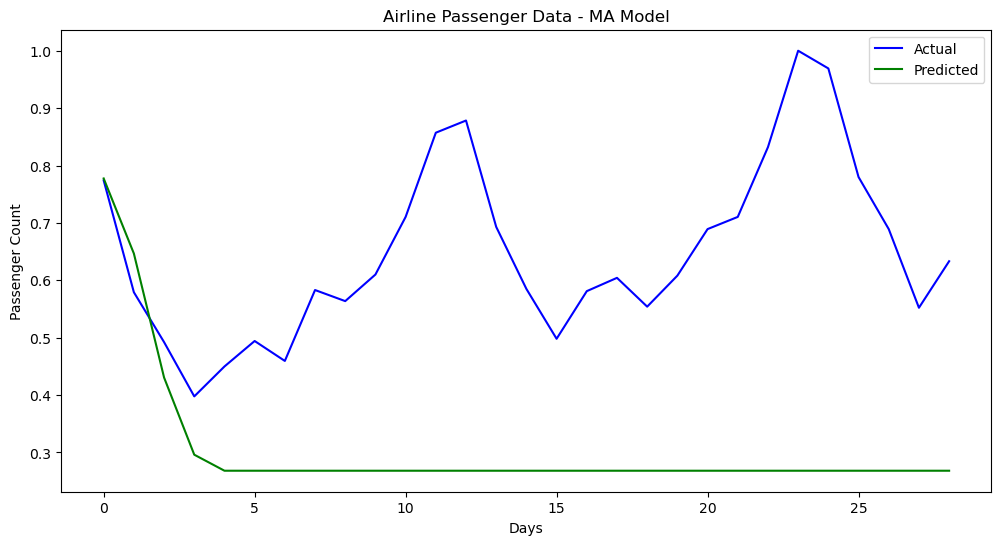

In [10]:

# Plot actual vs predicted
y_test_df = pd.DataFrame(y_test, columns=['Passenger_Count'])
y_pred_df = pd.DataFrame(y_pred, columns=['Passenger_Count'])
graph(y_test_df, y_pred_df, "Actual", "Predicted", "Airline Passenger Data - MA Model", "Days", "Passenger Count")

In [11]:
# Inverse transform predictions
aTestNormTable = pd.DataFrame(y_test, columns=['Passenger_Count'])
actual_passenger_count = scaler.inverse_transform(aTestNormTable)

# Convert the numpy array to a DataFrame with column name 'Passenger_Count'
actual_passenger_count_df = conversionSingle(actual_passenger_count, ['Passenger_Count'])
print("Actual Passenger Count:\n", actual_passenger_count_df)


Actual Passenger Count:
     Passenger_Count
0             505.0
1             404.0
2             359.0
3             310.0
4             337.0
5             360.0
6             342.0
7             406.0
8             396.0
9             420.0
10            472.0
11            548.0
12            559.0
13            463.0
14            407.0
15            362.0
16            405.0
17            417.0
18            391.0
19            419.0
20            461.0
21            472.0
22            535.0
23            622.0
24            606.0
25            508.0
26            461.0
27            390.0
28            432.0


In [12]:
pTestNormTable = pd.DataFrame(y_pred, columns=['Passenger_Count'])
predicted_passenger_count = scaler.inverse_transform(pTestNormTable)
predicted_passenger_count_df = conversionSingle(predicted_passenger_count, ['Passenger_Count'])
print("Predicted Passenger Count:\n", predicted_passenger_count_df)

Predicted Passenger Count:
     Passenger_Count
0        506.710393
1        438.957665
2        327.044481
3        257.376821
4        242.913661
5        242.913661
6        242.913661
7        242.913661
8        242.913661
9        242.913661
10       242.913661
11       242.913661
12       242.913661
13       242.913661
14       242.913661
15       242.913661
16       242.913661
17       242.913661
18       242.913661
19       242.913661
20       242.913661
21       242.913661
22       242.913661
23       242.913661
24       242.913661
25       242.913661
26       242.913661
27       242.913661
28       242.913661


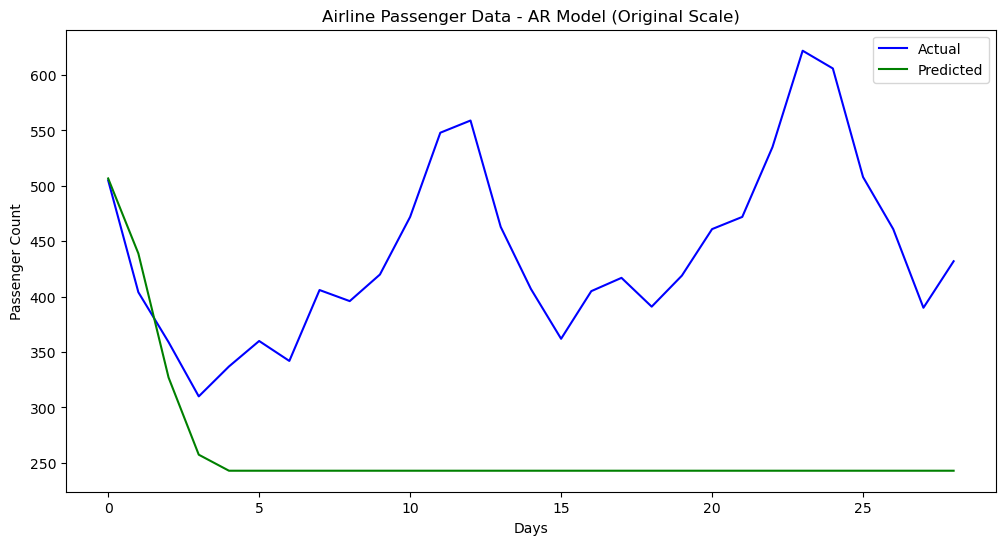

In [13]:
# Plot actual vs predicted with original scale
graph(actual_passenger_count_df, predicted_passenger_count_df, "Actual", "Predicted", "Airline Passenger Data - AR Model (Original Scale)", "Days", "Passenger Count")

In [14]:
# Evaluate performance
rmsemape(actual_passenger_count_df, predicted_passenger_count_df)

RMSE-Testset: 203.37064228813796
MAPE-Testset: 0.39335037055073724


In [15]:
# Forecast future values
forecast_steps = 12  # Forecasting for 1 year
forecast = model_fit.predict(start=len(data_scaled), end=len(data_scaled) + forecast_steps - 1)


In [16]:
# Save forecast to CSV
fTestNormTable = pd.DataFrame(forecast, columns=["Forecast"])
forecast_passenger_count = scaler.inverse_transform(fTestNormTable)
forecast_passenger_count_df = conversionSingle(forecast_passenger_count, ["Forecast"])
forecast_passenger_count_df.to_csv("AirlinePassengerForecast.csv", index=False)


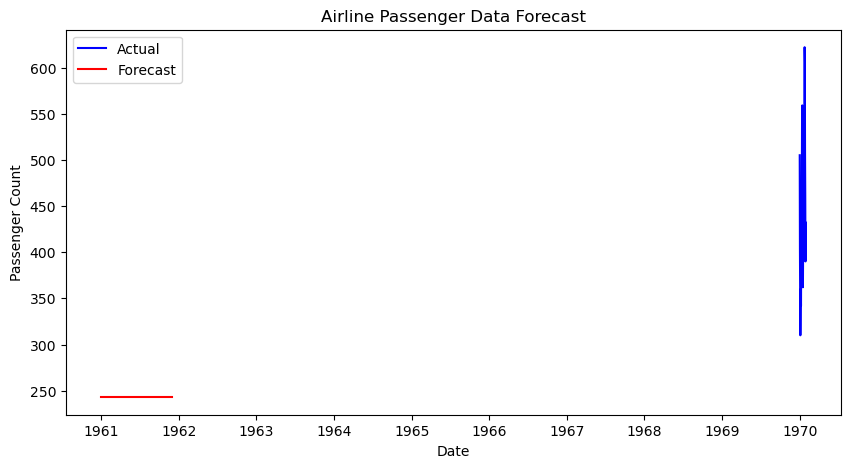

In [17]:
# Plot forecast
plt.figure(figsize=(10, 5))
plt.plot(actual_passenger_count_df, color='blue', label="Actual")
plt.plot(pd.date_range(start=data.index[-1], periods=forecast_steps, freq='M'), forecast_passenger_count_df, color='red', label="Forecast")
plt.title("Airline Passenger Data Forecast")
plt.xlabel("Date")
plt.ylabel("Passenger Count")
plt.legend()
plt.show()

In [18]:
# Evaluate performance
rmsemape(actual_passenger_count_df, predicted_passenger_count_df)

RMSE-Testset: 203.37064228813796
MAPE-Testset: 0.39335037055073724


In [19]:
# Forecast future values
forecast_steps = 12  # Forecasting for 1 year
forecast = model_fit.predict(start=len(data_scaled), end=len(data_scaled) + forecast_steps - 1)

In [20]:
# Save forecast to CSV
fTestNormTable = pd.DataFrame(forecast, columns=["Forecast"])
forecast_passenger_count = scaler.inverse_transform(fTestNormTable)
forecast_passenger_count_df = conversionSingle(forecast_passenger_count, ["Forecast"])
forecast_passenger_count_df.to_csv("AirlinePassengerForecast_MA.csv", index=False)

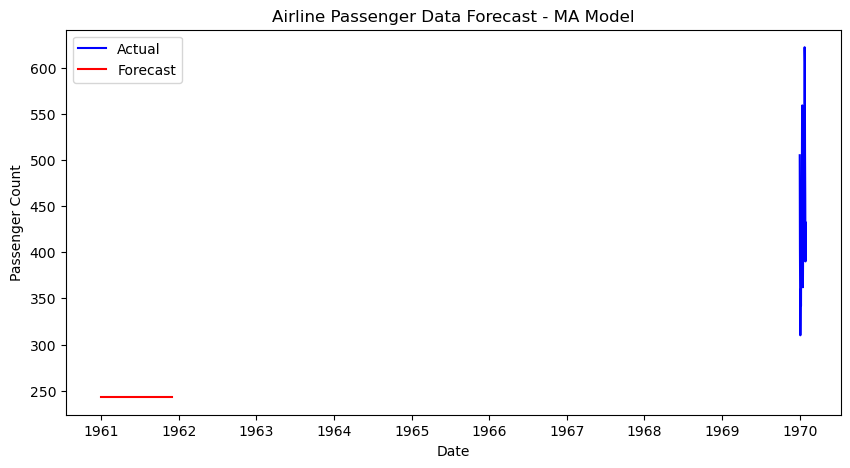

In [21]:
# Plot forecast
plt.figure(figsize=(10, 5))
plt.plot(actual_passenger_count_df, color='blue', label="Actual")
plt.plot(pd.date_range(start=data.index[-1], periods=forecast_steps, freq='M'), forecast_passenger_count_df, color='red', label="Forecast")
plt.title("Airline Passenger Data Forecast - MA Model")
plt.xlabel("Date")
plt.ylabel("Passenger Count")
plt.legend()
plt.show()